In [2]:
packageVersion("monocle3")
rm(list = ls())  # Clear the environment
options(warn=-1) # Turn off warning message globally
library("monocle3") # Load Monocle
library("Biobase")
library("Seurat")
library("ggplot2")
library("xlsx")

[1] ‘0.2.3.0’

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie


# subsetting cells and genes

In [3]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

In [4]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [5]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [6]:
#hormone rich Esr1
Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
#Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat6_barcode,Vgat16_barcode)

In [7]:
Vgat_barcode_AM<-intersect(rownames(AM@meta.data),Hormone_rich)
Vgat_barcode_P35M<-intersect(rownames(P35M@meta.data),Hormone_rich)
Vgat_barcode_P23M<-intersect(rownames(P23M@meta.data),Hormone_rich)
Vgat_barcode_Cast<-intersect(rownames(Cast@meta.data),Hormone_rich)
Vgat_barcode_AF<-intersect(rownames(AF@meta.data),Hormone_rich)
Vgat_barcode_P35F<-intersect(rownames(P35F@meta.data),Hormone_rich)
Vgat_barcode_P23F<-intersect(rownames(P23F@meta.data),Hormone_rich)
Vgat_barcode_OVX<-intersect(rownames(OVX@meta.data),Hormone_rich)

In [8]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
    celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]
    conditiontype[i]<-paste(MPOA.integrated@meta.data$stim[i],celltype[i],sep="")
}
MPOA.integrated@meta.data$celltype<-celltype
MPOA.integrated@meta.data$conditiontype<-conditiontype

In [9]:

merge_all<-subset(x =MPOA.integrated, cells=c(Vgat_barcode_P23F,Vgat_barcode_P35F,Vgat_barcode_AF,Vgat_barcode_OVX))


In [10]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(merge_all@meta.data)){
    k<-grep(rownames(merge_all@meta.data)[i],rownames(MPOA.integrated@meta.data))
    celltype[i]<-MPOA.integrated$celltype[k]
    conditiontype[i]<-MPOA.integrated$conditiontype[k]
}
merge_all@meta.data$celltype<-celltype
merge_all@meta.data$conditiontype<-conditiontype

In [11]:
Esr1KOF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_Esr1KOF/Neuron/Esr1KOF.rds")
new.ident <- c("Mix1","eVgat1","eVgat2","eVgat3","eVglu1","eVglu2","Mix2","eVgat4","eVgat5","eVglu3","Mix3","eVglu4","eVglu5","eVgat6","eVglu6","eVglu7")
names(x = new.ident) <- levels(x =Esr1KOF)
Esr1KOF<- RenameIdents(object =Esr1KOF, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Esr1KOF@assays$RNA@data[,which(Idents(object=Esr1KOF) %in% new.ident[i])]))}

In [12]:
Esr1KOF@meta.data$celltype<-Idents(Esr1KOF)

In [13]:
#3,4,7
Esr1KOF<-subset(Esr1KOF,cells=c(eVgat3_barcode,eVgat1_barcode))

In [14]:
merge_all<-merge(x=merge_all,y=Esr1KOF)

In [15]:
for(i in 1:dim(merge_all@meta.data)[1]){
    if(is.na(merge_all@meta.data$stim[i])){merge_all@meta.data$stim[i]<-"Esr1KOF"}else{
        merge_all@meta.data$stim[i]<-merge_all@meta.data$stim[i]
    }
}

In [16]:

merge_all@meta.data$stim<-factor(merge_all@meta.data$stim,levels=c("Esr1KOF","P23F","P35F","AF","OVX"))
merge_all@meta.data$celltype<-factor(merge_all@meta.data$celltype,levels=c("eVgat1","eVgat3","Vgat2","Vgat4","Vgat16"))

using DEGs generated using log data

In [17]:
library(xlsx)
x<-200
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>x){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:x,]}else{
    gene_list<-gene_list
}


unique_gene1<-unique(c(as.character(gene_list[,1])))

gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>x){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:x,]}else{
    gene_list<-gene_list
}

unique_gene2<-unique(c(as.character(gene_list[,1])))

unique_gene<-unique(c(unique_gene1,unique_gene2))

# make monocle object

In [18]:
GTF <- read.table(file='/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/features.tsv')
colnames(GTF)<-c("id","gene_short_name","gene_expression")
common<-intersect(GTF$gene_short_name,rownames(merge_all@assays$RNA@data))

In [19]:
unique_gene[!(unique_gene %in% common)]

character(0)

In [20]:
GTF<-GTF[GTF$gene_short_name %in% common, ]
merge_all@assays$RNA@counts<-merge_all@assays$RNA@counts[common, ]
GTF<-GTF[!duplicated(GTF$gene_short_name),]

In [21]:
rownames(GTF)<-GTF$gene_short_name

In [22]:
#201030
merge_all_m <-new_cell_data_set(as.matrix(merge_all@assays$RNA@counts), cell_metadata =merge_all@meta.data,gene_metadata = GTF)
merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =10,use_genes=unique_gene)
merge_all_m <- reduce_dimension(merge_all_m,reduction_method = "UMAP",preprocess_method = 'PCA')

In [23]:
merge_all_m  <- cluster_cells(merge_all_m )

In [24]:
merge_all_m <- learn_graph(merge_all_m,use_partition = FALSE)

  |======================================================================| 100%


In [25]:
cell_type_color <- c("Esr1KOF"= "deepskyblue1","P23F"= "gray8",
"P35F"= "#E0479E",
"AF"="#832232",
"OVX"= "#FFCD73")

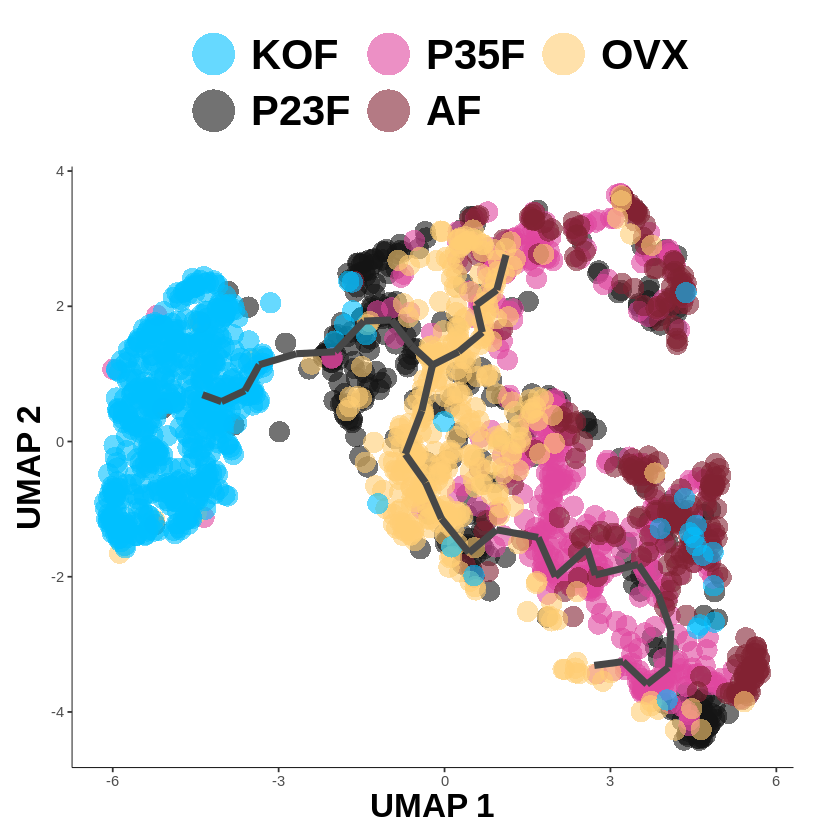

In [26]:
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =6,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color,labels=c("Esr1KOF" = "KOF", "P23F" = "P23F", "OVX" = "OVX", "P35F" = "P35F", "AF" = "AF"))+ guides(colour = guide_legend(override.aes = list(size=12),nrow=2))+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 25,face="bold") ,legend.position ="top", plot.margin = margin(10, 28, 10, 10))
#ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/trajectory_stim_female_VgatEsr1_onlyusing3_200_10dim_usingEsr1gene_narrow.pdf",width=7,height=10)

In [25]:
celltype_color <- c("Vgat2" = "#697A21",
                    "Vgat4" = "#88A0B4",
                    "Vgat6"="#000C3F",
                    "Vgat16" = 'yellow')

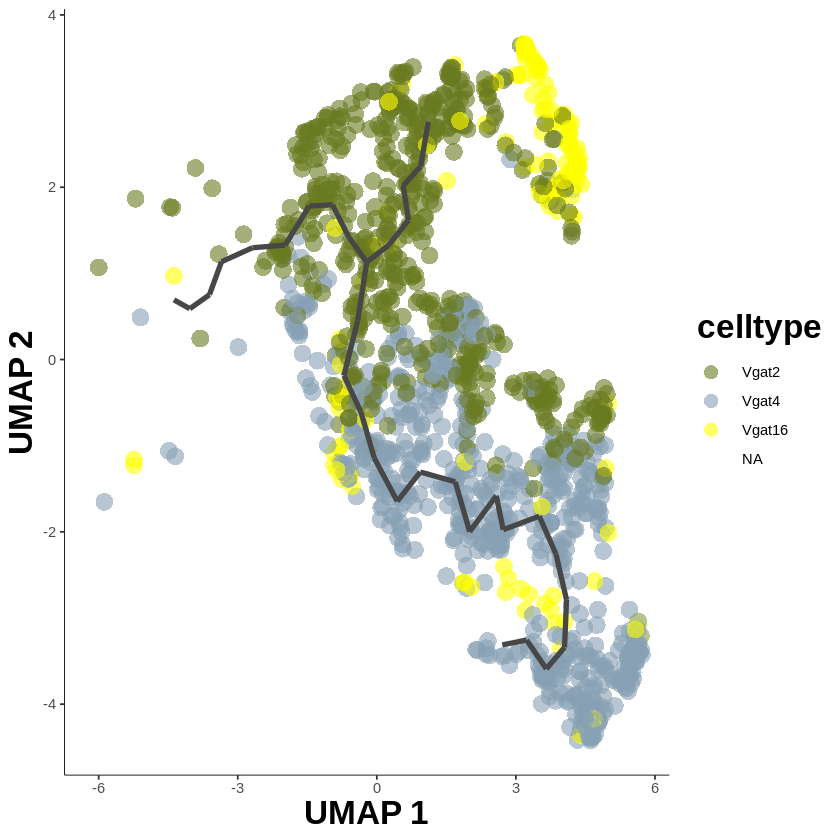

In [26]:
plot_cells(merge_all_m,
           color_cells_by = "celltype",cell_size =5,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 1.5,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = celltype_color)+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/trajectory_cell_type_female_VgatEsr1_onlyusing3_200_12dim_usingEsr1gene.pdf",width=10,height=10)

In [27]:
get_earliest_principal_node <- function(merge_all_m, stim="Esr1KOF"){
  cell_ids <- which(colData(merge_all_m)[, "stim"] == stim)
  
  closest_vertex <-
  merge_all_m@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(merge_all_m), ])
  root_pr_nodes <-
  igraph::V(principal_graph(merge_all_m)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
merge_all_m<- order_cells(merge_all_m, root_pr_nodes=get_earliest_principal_node(merge_all_m))

In [28]:
get_earliest_principal_node(merge_all_m)

[1] "Y_30"

In [29]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}

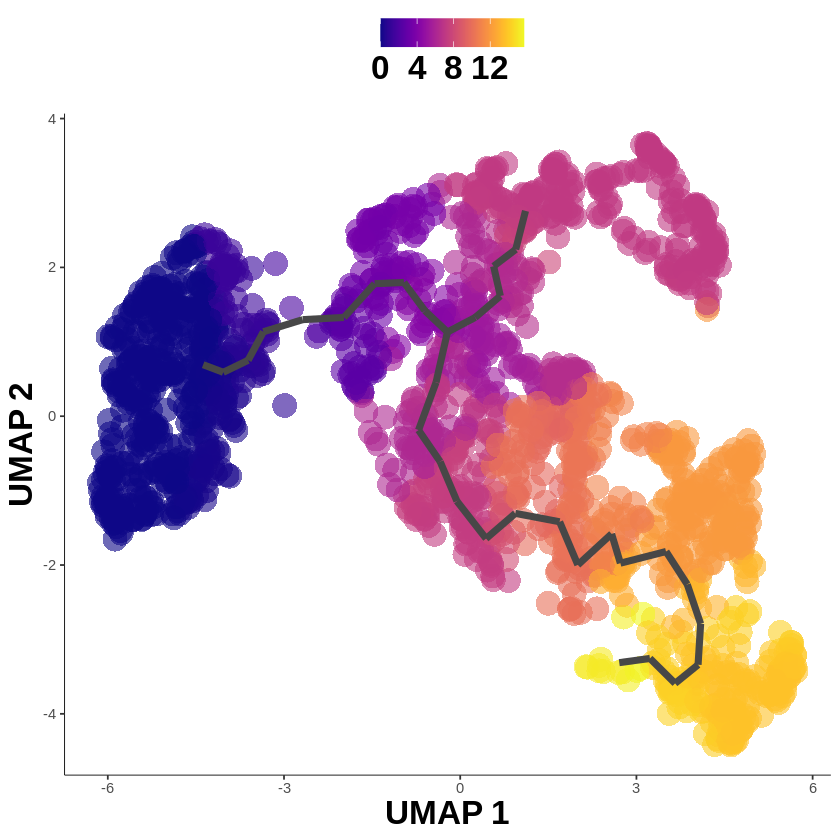

In [31]:
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/trajectory_psedutime_female_VgatEsr1_onlyusing3_200_12dim_usingEsr1gene_rootOVX_narrow.pdf",width=7,height=10)

In [31]:
saveRDS(merge_all_m,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/merge_all_m.rds")

# branch analysis

In [18]:
merge_all_m<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/merge_all_m.rds")

In [19]:
celltype_color <- c("Vgat2" = "cadetblue1",
                    "Vgat4" = "blue1",
                    "Vgat16" = 'dodgerblue4',
                   "eVgat3"="lightsalmon","eVgat1"="darkgray")

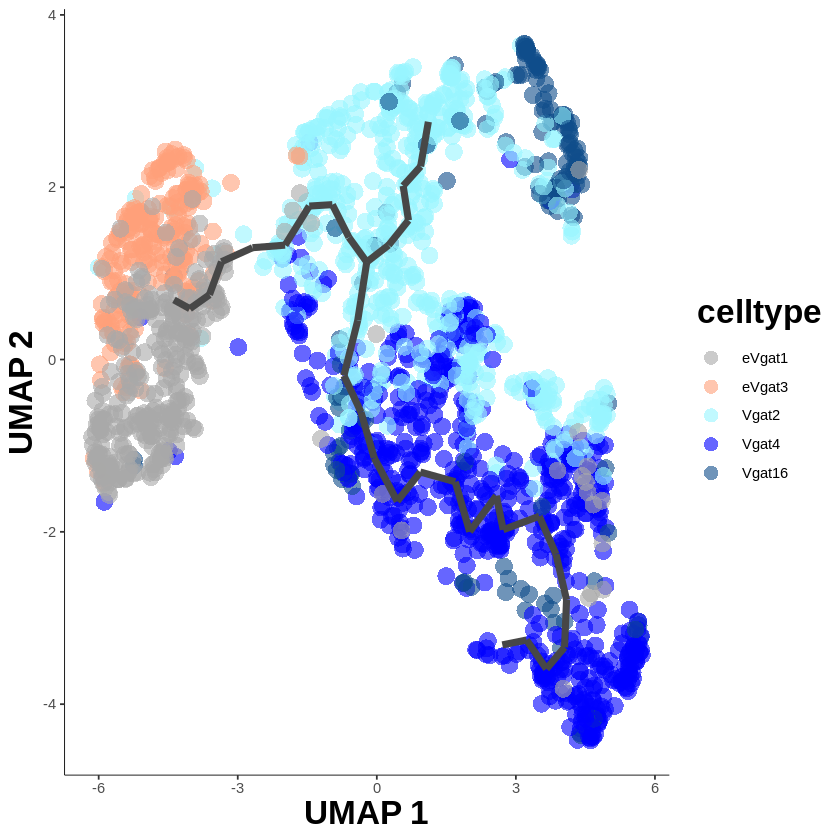

In [20]:
plot_cells(merge_all_m,
           color_cells_by = "celltype",cell_size =5,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,
           label_leaves=FALSE,cell_stroke = I(0/2),label_roots = FALSE,
           label_branch_points=FALSE)+
                     scale_color_manual(values = celltype_color)+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/trajectory_psedutime_male_celltype.pdf",width=7,height=10)

In [152]:
branch1_rnames<-numeric()
UMAP<-merge_all_m@int_colData@listData$reducedDims@listData$UMAP
for(i in 1:dim(UMAP)[1]){
if(UMAP[i,1]>1.5 & UMAP[i,2]> 1){
    branch1_rnames<-c(branch1_rnames,rownames(UMAP)[i])
}else{branch1_rnames<-branch1_rnames}
}

In [153]:
branch2_rnames<-numeric()
UMAP<-merge_all_m@int_colData@listData$reducedDims@listData$UMAP
for(i in 1:dim(UMAP)[1]){
if(UMAP[i,1]> 2.1 & UMAP[i,2]< 0){
    branch2_rnames<-c(branch2_rnames,rownames(UMAP)[i])
}else{branch2_rnames<-branch2_rnames}
}

In [154]:
Trunk1_rnames<-numeric()
UMAP<-merge_all_m@int_colData@listData$reducedDims@listData$UMAP
for(i in 1:dim(UMAP)[1]){
if(UMAP[i,1]< 2 & UMAP[i,2]> 0.8){
    Trunk1_rnames<-c(Trunk1_rnames,rownames(UMAP)[i])
}else if(UMAP[i,1]< -3){
    Trunk1_rnames<-c(Trunk1_rnames,rownames(UMAP)[i])
}else{Trunk1_rnames<-Trunk1_rnames}
}

In [155]:
Trunk_names<-rownames(UMAP)[rownames(UMAP) %in% c(branch1_rnames,branch2_rnames) ==FALSE]

In [156]:
Trunk2_rnames<-rownames(UMAP)[rownames(UMAP) %in% c(branch1_rnames,branch2_rnames,Trunk1_rnames) ==FALSE]

In [157]:
branch<-numeric()
for(i in 1:dim(colData(merge_all_m))[1]){
if(rownames(colData(merge_all_m))[i] %in% branch1_rnames){
    branch<-c(branch,"branch1")
}else if(rownames(colData(merge_all_m))[i] %in% branch2_rnames){
    branch<-c(branch,"branch2")
}else if(rownames(colData(merge_all_m))[i] %in% Trunk1_rnames){
    branch<-c(branch,"trunk1")
}else if(rownames(colData(merge_all_m))[i] %in% Trunk2_rnames){
    branch<-c(branch,"trunk2")
}
}

In [158]:
colData(merge_all_m)$branch<-factor(branch)

In [159]:
branch_color <- c("branch1" = "cadetblue1",
                    "branch2" = "blue1",
                  "branch3" = "darkblue",
                    "trunk1" = 'dodgerblue',
                    "trunk2" = 'dodgerblue4')

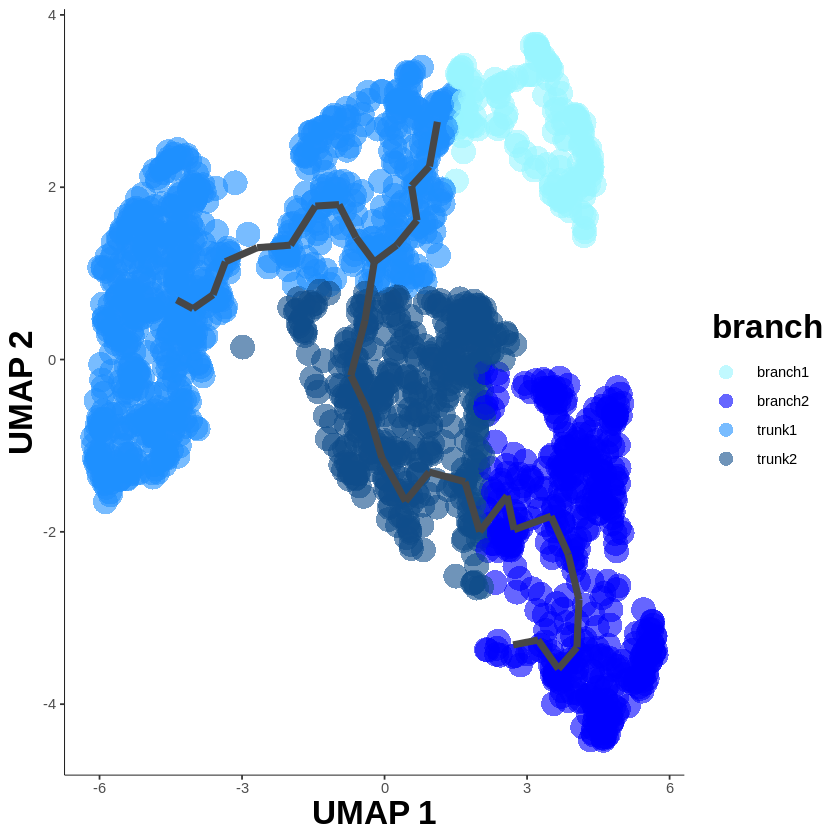

In [160]:
plot_cells(merge_all_m,
           color_cells_by = "branch",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,
           label_leaves=FALSE,cell_stroke = I(0/2), label_roots = FALSE,
           label_branch_points=FALSE,graph_label_size = 5)+
                 scale_color_manual(values = branch_color)+  theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/trajectory_cell_type_male_VgatEsr1KOF_branches.pdf",width=10,height=7)

In [161]:
merge_all_seurat<-merge_all

In [162]:
#just in case
branch<-numeric()
for(i in 1:dim(merge_all_seurat@meta.data)[1]){
if(rownames(merge_all_seurat@meta.data)[i] %in% branch1_rnames){
    branch<-c(branch,"branch1")
}else if(rownames(merge_all_seurat@meta.data)[i] %in% branch2_rnames){
    branch<-c(branch,"branch2")
}else if(rownames(merge_all_seurat@meta.data)[i] %in% Trunk1_rnames){
    branch<-c(branch,"trunk1")
}else if(rownames(merge_all_seurat@meta.data)[i] %in% Trunk2_rnames){
    branch<-c(branch,"trunk2")
}
}

In [163]:
merge_all_seurat@meta.data$branch<-branch
Idents(merge_all_seurat = merge_all_seurat) <- merge_all_seurat@meta.data$branch

In [164]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch1", ident.2 =c("trunk1"),print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/DEG/branch1_over_trunk/all_gene.xlsx"))


In [165]:
one.markers <- FindMarkers(merge_all_seurat, ident.1 = "branch2", ident.2 =c("trunk1","trunk2"),print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]

write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/DEG/branch2_over_trunk/all_gene.xlsx"))


In [166]:
# specific DEGs
branch1<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/DEG/branch1_over_trunk/all_gene.xlsx",sheetIndex=1)
branch2<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/DEG/branch2_over_trunk/all_gene.xlsx",sheetIndex=1)
#specific version
branch1_gene<-intersect(subset(branch1,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch2,avg_logFC< 0)[,1])
branch2_gene<-intersect(subset(branch2,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch1,avg_logFC< 0)[,1])
both<-intersect(subset(branch1,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1],subset(branch2,p_val_adjust<0.05 & avg_logFC>0.1 & pct.1>0.1)[,1])
gene_list<-c(as.character(branch1_gene[branch1_gene %in% both==FALSE]),as.character(branch2_gene[branch2_gene %in% both==FALSE]),both)

In [168]:
#for branch1
B1<-merge_all_m
b1<-c(branch1_rnames,Trunk1_rnames)
spacing<-5
Pseudotime<-seq(0, ceiling(max(B1@principal_graph_aux@listData$UMAP$pseudotime[b1])), by=ceiling(max(B1@principal_graph_aux@listData$UMAP$pseudotime[b1]))/spacing)
Pseudotime<-Pseudotime[1:spacing]
int<-Pseudotime[2]-Pseudotime[1]
#220405
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(B1@principal_graph_aux@listData$UMAP$pseudotime[b1])[Pseudotime[p]< B1@principal_graph_aux@listData$UMAP$pseudotime[b1] &  B1@principal_graph_aux@listData$UMAP$pseudotime[b1]<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],b1]))/sd(merge_all@assays$RNA@data[gene_list[i],b1])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
temp_gene<-gene_list

In [169]:
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]==as.character(branch2_gene[branch2_gene %in% both==FALSE])[1] | temp_gene[i]==both[1] ){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [170]:
max(B1@principal_graph_aux@listData$UMAP$pseudotime[Trunk_names])
min(B1@principal_graph_aux@listData$UMAP$pseudotime[branch1_rnames])
Pseudotime[4]

[1] 11.01605

[1] 7.146165

[1] 7.2

In [171]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[4]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

In [172]:
library(scales)

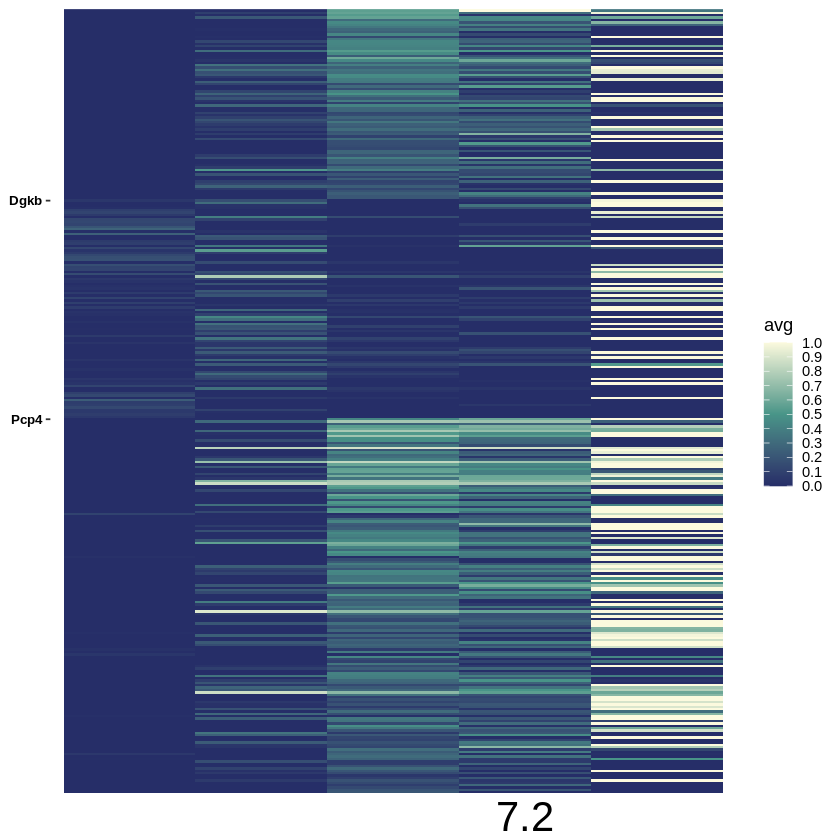

In [173]:
genes<-c(as.character(branch2_gene[branch2_gene %in% both==FALSE])[1],both[1])
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) # + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/female_branch1DEG_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

In [174]:
#branch2
B2<-merge_all_m
b2<-c(branch2_rnames,Trunk1_rnames,Trunk2_rnames)
spacing<-8 # change the spacing
Pseudotime<-seq(0, ceiling(max(B2@principal_graph_aux@listData$UMAP$pseudotime[b2])), by=ceiling(max(B2@principal_graph_aux@listData$UMAP$pseudotime[b2]))/spacing)
Pseudotime<-Pseudotime[1:spacing]
int<-Pseudotime[2]-Pseudotime[1]
#220405
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(B2@principal_graph_aux@listData$UMAP$pseudotime[b2])[Pseudotime[p]< B2@principal_graph_aux@listData$UMAP$pseudotime[b2] &  B2@principal_graph_aux@listData$UMAP$pseudotime[b2]<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],b2]))/sd(merge_all@assays$RNA@data[gene_list[i],b2])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
temp_gene<-gene_list

In [177]:
max(B1@principal_graph_aux@listData$UMAP$pseudotime[Trunk_names])
min(B1@principal_graph_aux@listData$UMAP$pseudotime[branch2_rnames])
Pseudotime[6]

[1] 11.01605

[1] 10.0244

[1] 10

In [178]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[6]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

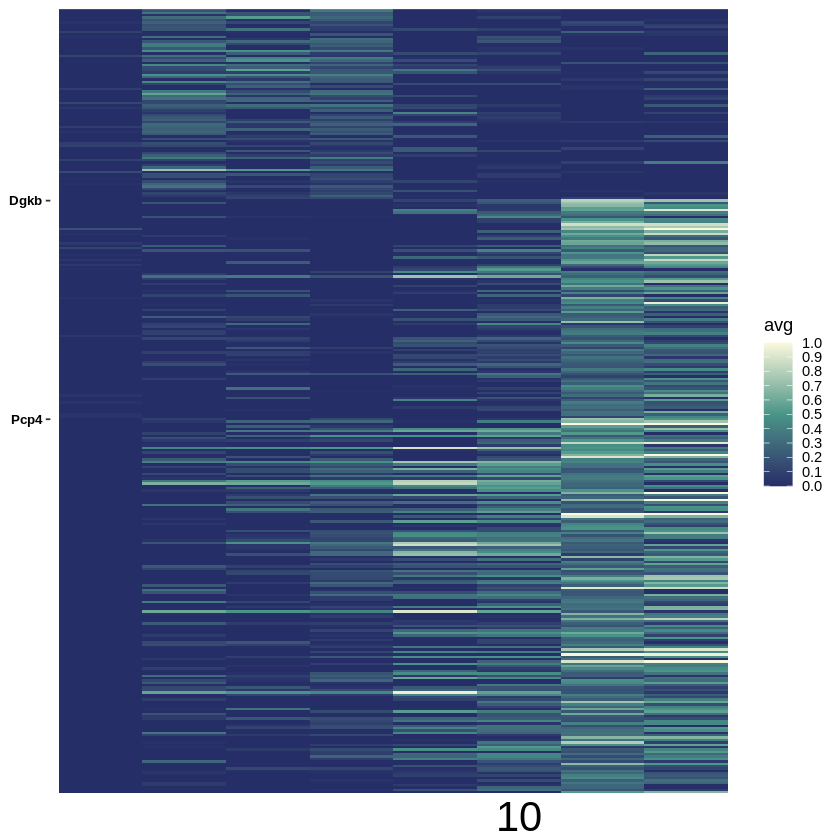

In [179]:
genes<-c(as.character(branch2_gene[branch2_gene %in% both==FALSE])[1],both[1])
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) # + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/female_branch2DEG_",low,"_",high,"color_adjusted.pdf"),width=7,height=10)

# comparing pseudotime

In [30]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}
merge_all@meta.data$pseudotime<-pseudotime

In [31]:
age<-numeric()
color<-numeric()
for(i in 1:dim(merge_all@meta.data)[1]){
    if(merge_all@meta.data$stim[i]=="P23F"){age[i]<-23
                                           color[i]<-"#FFCFD2"}
    else if (merge_all@meta.data$stim[i]=="P35F"){age[i]<-35
                                           color[i]<-"#E0479E"}
    else if (merge_all@meta.data$stim[i]=="AF"){age[i]<-50
                                           color[i]<-"#832232"}
     else if (merge_all@meta.data$stim[i]=="OVX"){age[i]<-50
                                           color[i]<- "#FFCD73"}
    else if (merge_all@meta.data$stim[i]=="Esr1KOF"){age[i]<-50
                                           color[i]<- "deepskyblue1"}
}
   merge_all@meta.data$age<-age
    merge_all@meta.data$color<-color

In [32]:
#statistics
correct<-5*4/2
c<-"P23F"
s<-"P35F"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P23F"
s<-"AF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P23F"
s<-"OVX"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P23F"
s<-"Esr1KOF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P35F"
s<-"AF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P35F"
s<-"OVX"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"P35F"
s<-"Esr1KOF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"AF"
s<-"OVX"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"AF"
s<-"Esr1KOF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

c<-"OVX"
s<-"Esr1KOF"
temp_c<-subset(merge_all@meta.data,stim==c)$pseudotime
temp_s<-subset(merge_all@meta.data,stim==s)$pseudotime
res <-wilcox.test(temp_c, temp_s, alternative = "two.sided")
assign(paste(c,s,sep=""),correct*res$p.value)

In [33]:
c<-"AF"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"P35F"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"P23F"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"OVX"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)
c<-"Esr1KOF"
mean(subset(merge_all@meta.data,stim==c)$pseudotime)

[1] 10.65763

[1] 10.01495

[1] 7.054437

[1] 7.071899

[1] 0.5955866

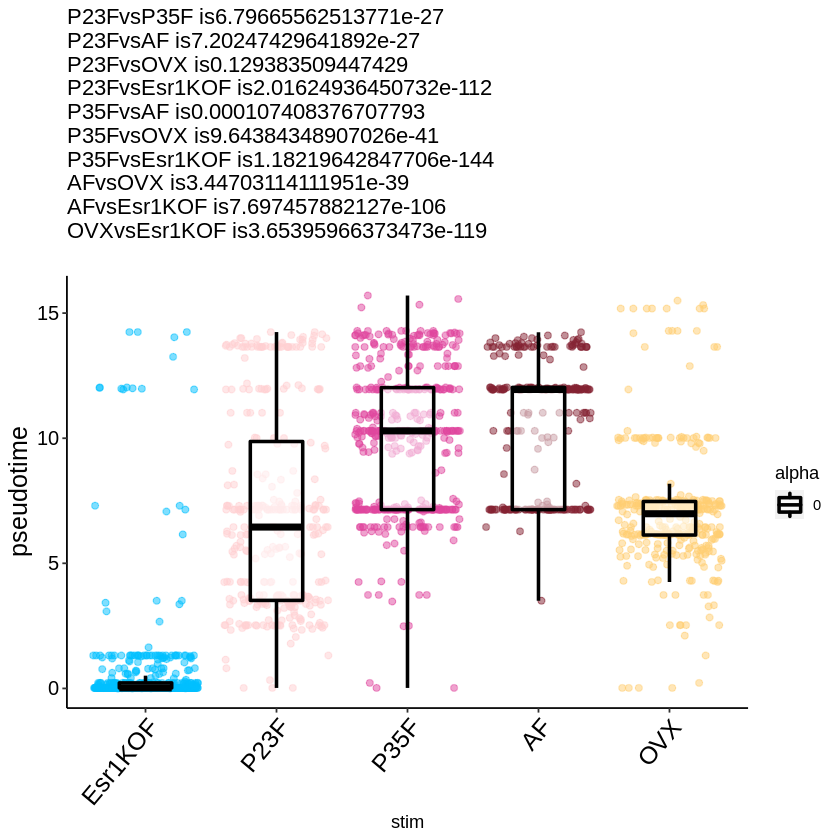

In [184]:
P<-ggplot(merge_all@meta.data,aes(x=stim,y=pseudotime))
P + geom_jitter(width = 0.4, alpha = 0.5,size=1.6,color=color)+geom_boxplot(color="black",width=0.4,aes( alpha = 0), size = 1,outlier.shape = NA,position = position_dodge(0.9)) +
  theme(axis.title.y=element_text(size=15,color="black"),axis.text.y=element_text(size=12,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 1,color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("P23FvsP35F is",P23FP35F,"\n","P23FvsAF is",P23FAF,"\n","P23FvsOVX is",P23FOVX,"\n","P23FvsEsr1KOF is",P23FEsr1KOF,"\n","P35FvsAF is",P35FAF,"\n","P35FvsOVX is",P35FOVX,"\n","P35FvsEsr1KOF is",P35FEsr1KOF,"\n","AFvsOVX is",AFOVX,"\n","AFvsEsr1KOF is",AFEsr1KOF,"\n","OVXvsEsr1KOF is",OVXEsr1KOF,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/Esr1KOF_pseudotime_Vgat_dots_usingEsr1gene.pdf",width=5,height=4)

In [34]:
#statics

In [35]:
kruskal.test(pseudotime ~ stim, data = merge_all@meta.data)
if(kruskal.test(pseudotime ~ stim, data = merge_all@meta.data)[3]<0.05){
print(pairwise.wilcox.test(merge_all@meta.data[,"pseudotime"], merge_all@meta.data$stim,p.adjust.method = "bonferroni"))
}


	Kruskal-Wallis rank sum test

data:  pseudotime by stim
Kruskal-Wallis chi-squared = 1194.6, df = 4, p-value < 2.2e-16



	Pairwise comparisons using Wilcoxon rank sum test 

data:  merge_all@meta.data[, "pseudotime"] and merge_all@meta.data$stim 

     Esr1KOF P23F    P35F    AF     
P23F < 2e-16 -       -       -      
P35F < 2e-16 < 2e-16 -       -      
AF   < 2e-16 < 2e-16 0.00011 -      
OVX  < 2e-16 0.12938 < 2e-16 < 2e-16

P value adjustment method: bonferroni 


# visualizing genes

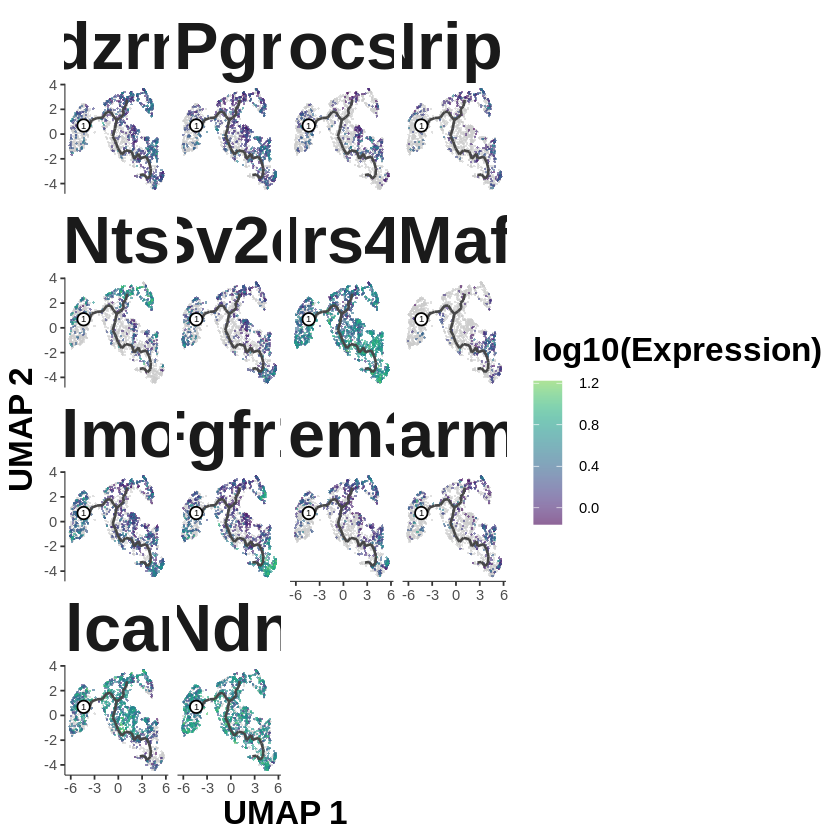

In [49]:
plot_cells(merge_all_m,
           genes=c("Pdzrn4","Pgr","Socs2","Nrip1","Nts","Sv2c","Irs4","Maf","Elmo1","Fgfr1","Tmem35a","Parm1","Alcam","Ndn"),cell_size =0.7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE, min_expr = 0.3)+
                    # scale_color_manual(values = celltype_color)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/trajectory_Esr1_female_Vgat_10_dim.pdf",width=10,height=10)

# Heatmap DEGs along trajectory

In [28]:
Cell_type<-c("P23F","OVX","P35F","AF")
Cell_type<-factor(Cell_type,levels=Cell_type)
AF_OVX_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
AF_P23F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_P23F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
OVX_AF_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23F_AF_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23F_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35F_OVX_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35F_P23F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_P23F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
OVX_P35F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_P35F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23F_P35F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23F_over_P35F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
hormone_50gene<-AF_OVX_gene
hormone_35gene<-P35F_OVX_gene
OVX_50gene<-OVX_AF_gene
OVX_35gene<-OVX_P35F_gene
P50_gene<-as.character(AF_P23F_gene)[!(AF_P23F_gene %in% c(hormone_50gene,hormone_35gene))]
P35_gene<-as.character(P35F_P23F_gene)[!(P35F_P23F_gene %in% c(hormone_50gene,hormone_35gene))]
P23_50_gene<-as.character(P23F_AF_gene)[!(P23F_AF_gene %in% OVX_50gene)]
P23_35_gene<-as.character(P23F_P35F_gene)[!(P23F_P35F_gene %in% OVX_35gene)]
age_gene<-unique(intersect(rev(P35_gene),rev(P50_gene))) # this is the list of genes that are high in mice >P35
#hormone_gene<-unique(intersect(hormone_50gene,hormone_35gene)) # this is the list of genes that are high in intact mice >P35
hormone_gene<-unique(c(as.character(hormone_50gene),as.character(hormone_35gene)))
young_gene<-P23_50_gene # this is the list of genes that are only high in P23
OVX_gene<-as.character(OVX_50gene)
gene_list<-rev(unique(rev(c(young_gene,OVX_gene,age_gene,hormone_gene))))

In [29]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)

[1] 15.70335

In [30]:
spacing<-16
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [32]:
int<-Pseudotime[2]-Pseudotime[1]

In [33]:
#201113
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}

In [34]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [35]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)
Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [36]:
temp_gene<-rev(unique(max_number_sort$gene))

In [37]:
library("scales")

In [41]:
#gene_list
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Selenow" | temp_gene[i]=="Ndn" | temp_gene[i]=="Apba1" | temp_gene[i]=="Fau" |temp_gene[i]=='Scg2'  | temp_gene[i]=="Nrp1" | temp_gene[i]=="Sv2c" | temp_gene[i]=="Pgr"){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [38]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[1] | Pseudotime[i]==Pseudotime[5] |  Pseudotime[i]==Pseudotime[10] | Pseudotime[i]==Pseudotime[15]){
        color_x[i]<-"black"
        size_x[i]<-20
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

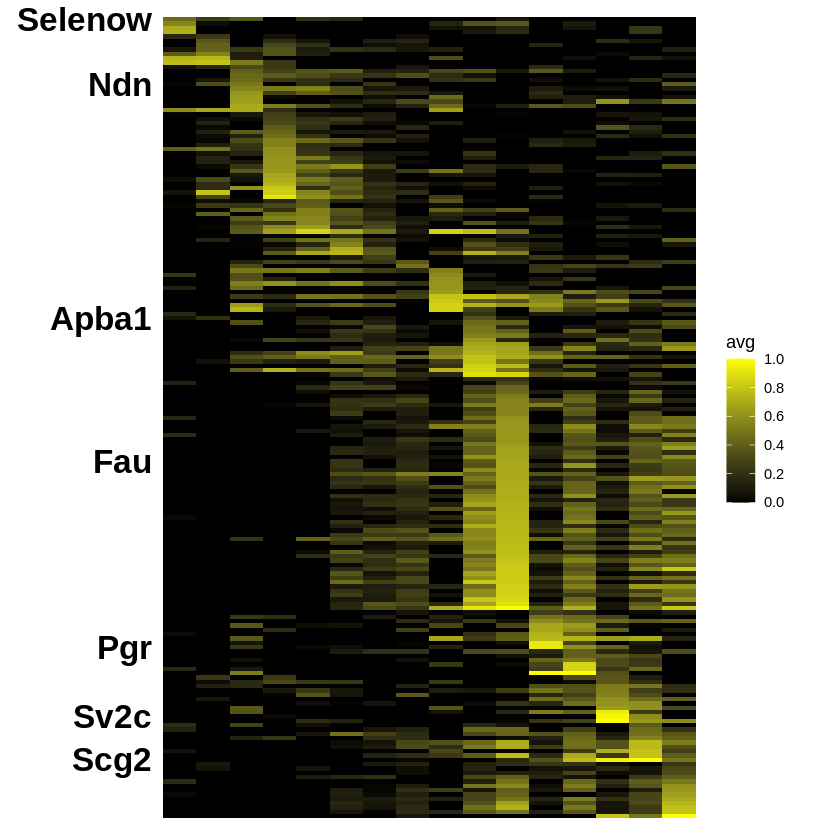

In [43]:
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=size, colour = color,face="bold"),axis.text.x=element_blank(),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank(), plot.margin = margin(10, 28, 10, 10))
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/DEG_heatmap_light_DEGtrajectory_12_",low,"_",high,".pdf"),width=7,height=8)
#dev.off()

In [39]:
genes<-c("Slc32a1","Esr1","Ar","Alcam","Pdzrn4","Creb3l1","Sccpdh","Socs2","Pgr","Tmem35a","Nts","Tead1","Napb","Selenow","Apba1","Sv2c","Ndn")

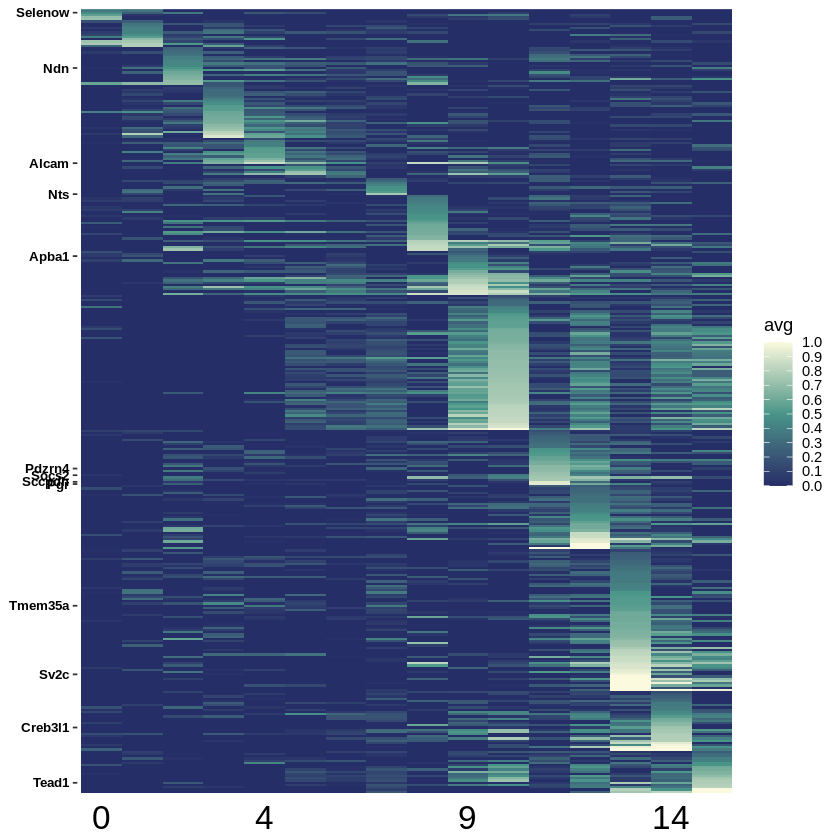

In [40]:
#210222 paper
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish)  #scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/Esr1KOF_DEG_heatmap_light_DEGtrajectory_12_",low,"_",high,".pdf"),width=7,height=10)

# proportion of each group along Pseudotime

In [44]:
spacing<-16
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing]

In [45]:
group<-c("Esr1KOF","P23F","OVX","P35F","AF")

In [46]:
int<-Pseudotime[2]-Pseudotime[1]

In [47]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(group)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "group"=(rep(group[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$proportion[p]<-100*sum(grepl(group[i],barcode))/dim(subset(merge_all@meta.data,stim==group[i]))[1]}
Cell_number<-rbind(Cell_number_t,Cell_number)}

In [48]:
Cell_number$group<-factor(Cell_number$group,levels=rev(group))
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

In [ ]:
,labels=c("Esr1KOF" = "KOF", "P23F" = "P23F", "OVX" = "OVX", "P35F" = "P35F", "AF" = "AF")

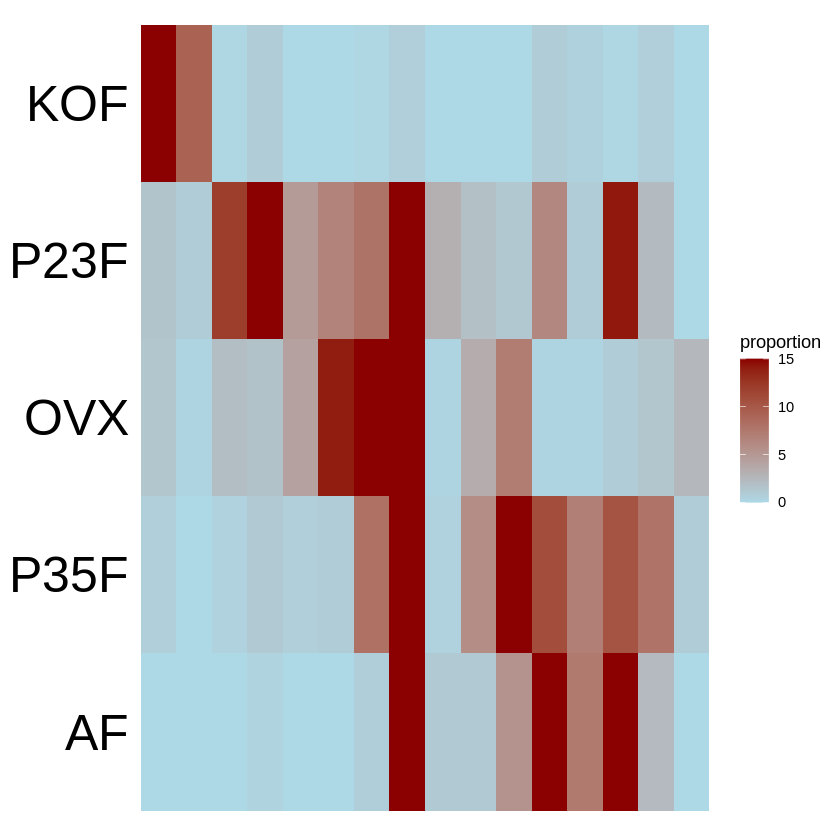

In [53]:
low<-0
high<-15
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = group,fill =proportion)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=5),low = "lightblue",high = "darkred", oob=squish)+scale_y_discrete(labels=c("Esr1KOF" = "KOF", "P23F" = "P23F", "OVX" = "OVX", "P35F" = "P35F", "AF" = "AF"))
pp<-p+ylab("proportion %")+xlab("psedutime")+theme(axis.text.y=element_text(size=30, colour = "black"),axis.text.x=element_blank(),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())+ggtitle("heatmap %")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/Esr1KOF/group_proportion_heatmap_light",low,"_",high,".pdf"),width=10,height=2)